In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
MU_S = 1000000

<ipython-input-2-4c8662f6d80c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(enc_schemes)


,raspberry-pi,arduino
AES-128-ECB,0.111178,0.042749
Acorn128,0.017050,0.006186
Ascon128,0.065079,0.023366
ChaChaPoly,0.047829,0.026613
GCM AES-128,0.013544,0.005792
GCM-Speck-256,0.041620,0.019821
GCM-SpeckTiny-256,0.037168,0.015251


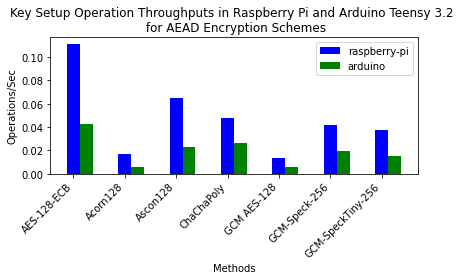

In [2]:
rpi_enc = pd.read_csv("../rasp_enc.csv", index_col=0)
ard_enc = pd.read_csv("../ard_enc.csv", index_col=0)
enc_schemes = sorted(['ChaChaPoly', 'GCM AES-128', 'GCM-Speck-256', 'GCM-SpeckTiny-256', 'AES-128-ECB', 'Ascon128', 'Acorn128'])
aead_key_times = {'raspberry-pi': {}, 'arduino': {}}

for enc_scheme in enc_schemes:
    aead_key_times['raspberry-pi'][enc_scheme] = rpi_enc.loc[enc_scheme, 'SetKey']
    aead_key_times['arduino'][enc_scheme] = ard_enc.loc[enc_scheme, 'SetKey']

df = pd.DataFrame(aead_key_times) / MU_S
fig, ax = plt.subplots()
X = np.arange(len(enc_schemes))
ax.set_xticklabels(enc_schemes)
ax.set_xticks(X)
ax.bar(X, df["raspberry-pi"].values, color = 'b', width = 0.25, label="raspberry-pi")
ax.bar(X+0.25, df["arduino"].values, color = 'g', width = 0.25, label="arduino")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title("Key Setup Operation Throughputs in Raspberry Pi and Arduino Teensy 3.2 \n for AEAD Encryption Schemes")
plt.xlabel("Methods")
plt.ylabel("Operations/Sec")
fig.tight_layout()
plt.savefig("aead_key_setup_times.png", bbox_inches='tight')
df

<ipython-input-3-1b0462a6e9f2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(enc_schemes)


,raspberry-pi,arduino
AES-128-ECB,0.395005,0.216789
Acorn128,3.426355,1.453422
Ascon128,1.011930,0.364054
ChaChaPoly,1.665437,0.969315
GCM AES-128,0.281221,0.143417
GCM-Speck-256,0.510344,0.327906
GCM-SpeckTiny-256,0.415049,0.237055


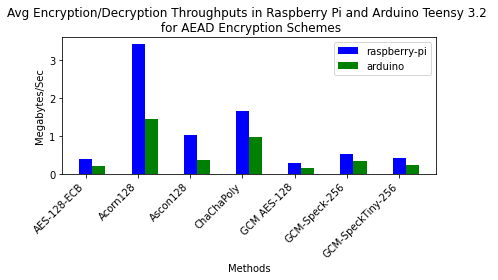

In [3]:
aead_avg_enc_dec = {'raspberry-pi': {}, 'arduino': {}}

for enc_scheme in enc_schemes:
    aead_avg_enc_dec['raspberry-pi'][enc_scheme] = (rpi_enc.loc[enc_scheme, 'Encrypt'] + rpi_enc.loc[enc_scheme, 'Decrypt']) / 2
    aead_avg_enc_dec['arduino'][enc_scheme] = (ard_enc.loc[enc_scheme, 'Encrypt'] + ard_enc.loc[enc_scheme, 'Encrypt']) / 2

df = pd.DataFrame(aead_avg_enc_dec) / MU_S
fig, ax = plt.subplots()
X = np.arange(len(enc_schemes))
ax.set_xticklabels(enc_schemes)
ax.set_xticks(X)
ax.bar(X, df["raspberry-pi"].values, color = 'b', width = 0.25, label="raspberry-pi")
ax.bar(X+0.25, df["arduino"].values, color = 'g', width = 0.25, label="arduino")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title("Avg Encryption/Decryption Throughputs in Raspberry Pi and Arduino Teensy 3.2 \n for AEAD Encryption Schemes")
plt.xlabel("Methods")
plt.ylabel("Megabytes/Sec")
fig.tight_layout()
plt.savefig("aead_avg_enc_dec.png", bbox_inches='tight')
df

<ipython-input-4-fba2bc7ebc3c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lwc_hashes)


,raspberry-pi,arduino
ASCON-HASH,0.472506,0.352164
Esch256,1.095039,0.753083
PHOTON-Beetle-HASH,0.038283,0.028735
Romulus-H,0.152866,0.094394
SHA256,1.485756,0.913024
Xoodyak-Hash,1.191336,0.675103


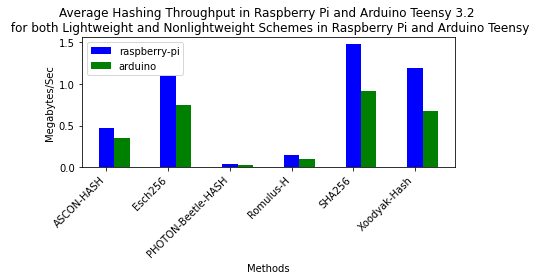

In [4]:
rpi_lwc = pd.read_csv("../rasp_comb.csv", index_col=0)
ard_lwc = pd.read_csv("../ard_comb.csv", index_col=0)
lwc_hashing = {'raspberry-pi': {}, 'arduino': {}}
lwc_hashes = sorted(['Xoodyak-Hash', 'SHA256', 'Esch256', 'ASCON-HASH', 'Romulus-H', 'PHOTON-Beetle-HASH'])
lwc_hash_efficiencies = {'raspberry-pi': {}, 'arduino': {}}

for lwc in lwc_hashes:
    # hash 1024 bytes,hash 128 bytes,hash 16 bytes
    lwc_hash_efficiencies['raspberry-pi'][lwc] = (rpi_lwc.loc[lwc, 'hash 1024 bytes'] + rpi_lwc.loc[lwc, 'hash 128 bytes'] + rpi_lwc.loc[lwc, 'hash 16 bytes'])/3
    lwc_hash_efficiencies['arduino'][lwc] = (ard_lwc.loc[lwc, 'hash 1024 bytes'] + ard_lwc.loc[lwc, 'hash 128 bytes'] + ard_lwc.loc[lwc, 'hash 16 bytes'])/3

df = pd.DataFrame(lwc_hash_efficiencies) / MU_S
fig, ax = plt.subplots()
X = np.arange(len(lwc_hashes))
ax.set_xticklabels(lwc_hashes)
ax.set_xticks(X)
ax.bar(X, df["raspberry-pi"].values, color = 'b', width = 0.25, label="raspberry-pi")
ax.bar(X+0.25, df["arduino"].values, color = 'g', width = 0.25, label="arduino")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title("Average Hashing Throughput in Raspberry Pi and Arduino Teensy 3.2 \n for both Lightweight and Nonlightweight Schemes in Raspberry Pi and Arduino Teensy")
plt.xlabel("Methods")
plt.ylabel("Megabytes/Sec")
fig.tight_layout()
plt.savefig("comb_lwc_bolded_hashing.png", bbox_inches='tight')
df

<ipython-input-5-619e18edf54e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lwc_encs)


,raspberry-pi,arduino
ASCON-128,2.603279,2.688987
Dumbo,1.998317,1.993660
GIFT-COFB,3.624379,2.951460
Grain-128AEAD,2.082755,2.067185
ISAP-A-128A,5.474994,5.570172
PHOTON-Beetle-AEAD-ENC-128,1.783235,1.771432
Romulus-N,2.587396,2.644682
Schwaemm256-128,3.680196,3.455311
TinyJAMBU-128,1.870058,1.932260
Xoodyak,2.769676,2.932620


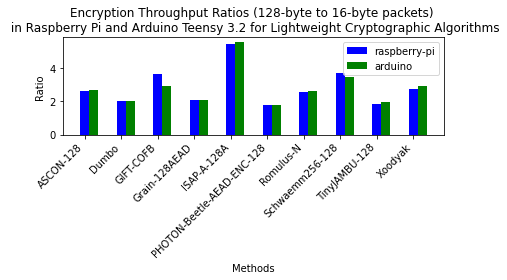

In [5]:
lwc_hashing = {'raspberry-pi': {}, 'arduino': {}}
lwc_encs = sorted(['ASCON-128', 'GIFT-COFB', 'TinyJAMBU-128', 'Xoodyak', 'ISAP-A-128A', 'Schwaemm256-128', 'Grain-128AEAD', 'Romulus-N', 'PHOTON-Beetle-AEAD-ENC-128', 'Dumbo'])
lwc_encryption_ratios = {'raspberry-pi': {}, 'arduino': {}}

for lwc in lwc_encs:
    # hash 1024 bytes,hash 128 bytes,hash 16 bytes
    lwc_encryption_ratios['raspberry-pi'][lwc] = rpi_lwc.loc[lwc, 'encrypt 128 byte packets'] / rpi_lwc.loc[lwc, 'encrypt 16 byte packets']
    lwc_encryption_ratios['arduino'][lwc] = ard_lwc.loc[lwc, 'encrypt 128 byte packets'] / ard_lwc.loc[lwc, 'encrypt 16 byte packets']

df = pd.DataFrame(lwc_encryption_ratios)
fig, ax = plt.subplots()
X = np.arange(len(lwc_encs))
ax.set_xticklabels(lwc_encs)
ax.set_xticks(X)
ax.bar(X, df["raspberry-pi"].values, color = 'b', width = 0.25, label="raspberry-pi")
ax.bar(X+0.25, df["arduino"].values, color = 'g', width = 0.25, label="arduino")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title("Encryption Throughput Ratios (128-byte to 16-byte packets) \n in Raspberry Pi and Arduino Teensy 3.2 for Lightweight Cryptographic Algorithms")
plt.xlabel("Methods")
plt.ylabel("Ratio")
fig.tight_layout()
plt.savefig("comb_lwc_bolded_encryption_rate_ratios.png", bbox_inches='tight')
df

<ipython-input-6-324665b26762>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lwc_encs)


,raspberry-pi,arduino
ASCON-128,874316.94,615739.88
Dumbo,41371.60,11651.11
GIFT-COFB,728182.96,501469.16
Grain-128AEAD,521204.47,250216.50
ISAP-A-128A,181810.43,114656.30
PHOTON-Beetle-AEAD-ENC-128,96738.48,73735.23
Romulus-N,203890.81,129117.25
Schwaemm256-128,1648295.04,1056750.88
TinyJAMBU-128,861198.95,648363.88
Xoodyak,1424913.73,855615.00


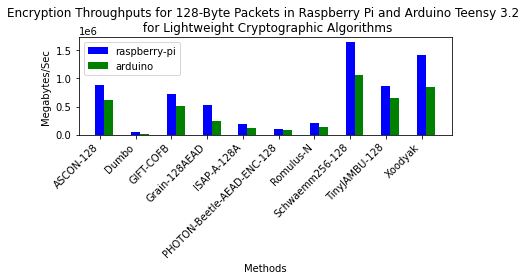

In [6]:
lwc_encryptions = {'raspberry-pi': {}, 'arduino': {}}

for lwc in lwc_encs:
    # hash 1024 bytes,hash 128 bytes,hash 16 bytes
    lwc_encryptions['raspberry-pi'][lwc] = rpi_lwc.loc[lwc, 'encrypt 128 byte packets'] 
    lwc_encryptions['arduino'][lwc] = ard_lwc.loc[lwc, 'encrypt 128 byte packets']

df = pd.DataFrame(lwc_encryptions)
fig, ax = plt.subplots()
X = np.arange(len(lwc_encs))
ax.set_xticklabels(lwc_encs)
ax.set_xticks(X)
ax.bar(X, df["raspberry-pi"].values, color = 'b', width = 0.25, label="raspberry-pi")
ax.bar(X+0.25, df["arduino"].values, color = 'g', width = 0.25, label="arduino")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title("Encryption Throughputs for 128-Byte Packets in Raspberry Pi and Arduino Teensy 3.2 \n for Lightweight Cryptographic Algorithms")
plt.xlabel("Methods")
plt.ylabel("Megabytes/Sec")
fig.tight_layout()
plt.savefig("comb_lwc_bolded_encryption_throughputs.png", bbox_inches='tight')
df

<ipython-input-7-a0360a49723f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lwc_encs)


,raspberry-pi,arduino
ASCON-128,849313.25,588343.44
Dumbo,41071.58,11638.91
GIFT-COFB,702370.50,476545.06
Grain-128AEAD,511043.33,244747.02
ISAP-A-128A,178539.05,113385.72
PHOTON-Beetle-AEAD-ENC-128,97029.53,73251.06
Romulus-N,196892.18,127335.81
Schwaemm256-128,1526444.46,965272.81
TinyJAMBU-128,808540.21,618477.00
Xoodyak,1339752.98,798303.63


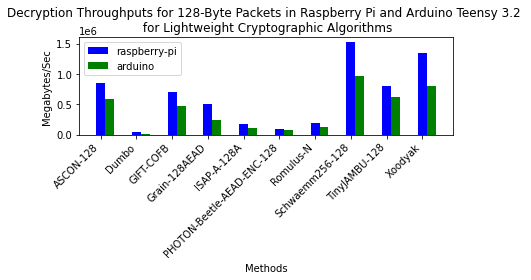

In [7]:
lwc_decryptions = {'raspberry-pi': {}, 'arduino': {}}

for lwc in lwc_encs:
    # hash 1024 bytes,hash 128 bytes,hash 16 bytes
    lwc_decryptions['raspberry-pi'][lwc] = rpi_lwc.loc[lwc, 'decrypt 128 byte packets'] 
    lwc_decryptions['arduino'][lwc] = ard_lwc.loc[lwc, 'decrypt 128 byte packets']
# print(lwc_decryptions)
df = pd.DataFrame(lwc_decryptions)
fig, ax = plt.subplots()
X = np.arange(len(lwc_encs))
ax.set_xticklabels(lwc_encs)
ax.set_xticks(X)
ax.bar(X, df["raspberry-pi"].values, color = 'b', width = 0.25, label="raspberry-pi")
ax.bar(X+0.25, df["arduino"].values, color = 'g', width = 0.25, label="arduino")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title("Decryption Throughputs for 128-Byte Packets in Raspberry Pi and Arduino Teensy 3.2 \n for Lightweight Cryptographic Algorithms")
plt.xlabel("Methods")
plt.ylabel("Megabytes/Sec")
fig.tight_layout()
plt.savefig("comb_lwc_bolded_decryption_throughputs.png", bbox_inches='tight')
df

<ipython-input-8-0878c2fc079d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lwc_encs)


,raspberry-pi,arduino
ASCON-128,861815.095,602041.660
Dumbo,41221.590,11645.010
GIFT-COFB,715276.730,489007.110
Grain-128AEAD,516123.900,247481.760
ISAP-A-128A,180174.740,114021.010
PHOTON-Beetle-AEAD-ENC-128,96884.005,73493.145
Romulus-N,200391.495,128226.530
Schwaemm256-128,1587369.750,1011011.845
TinyJAMBU-128,834869.580,633420.440
Xoodyak,1382333.355,826959.315


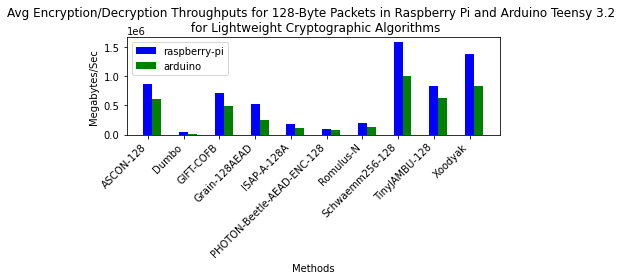

In [8]:
lwc_avg_enc_dec = {'raspberry-pi': {}, 'arduino': {}}

for lwc in lwc_encs:
    # hash 1024 bytes,hash 128 bytes,hash 16 bytes
    lwc_avg_enc_dec['raspberry-pi'][lwc] = (rpi_lwc.loc[lwc, 'encrypt 128 byte packets'] + rpi_lwc.loc[lwc, 'decrypt 128 byte packets']) / 2
    lwc_avg_enc_dec['arduino'][lwc] = (ard_lwc.loc[lwc, 'encrypt 128 byte packets'] + ard_lwc.loc[lwc, 'decrypt 128 byte packets']) / 2

df = pd.DataFrame(lwc_avg_enc_dec)
fig, ax = plt.subplots()
X = np.arange(len(lwc_encs))
ax.set_xticklabels(lwc_encs)
ax.set_xticks(X)
ax.bar(X, df["raspberry-pi"].values, color = 'b', width = 0.25, label="raspberry-pi")
ax.bar(X+0.25, df["arduino"].values, color = 'g', width = 0.25, label="arduino")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title("Avg Encryption/Decryption Throughputs for 128-Byte Packets in Raspberry Pi and Arduino Teensy 3.2 \n for Lightweight Cryptographic Algorithms")
plt.xlabel("Methods")
plt.ylabel("Megabytes/Sec")
fig.tight_layout()
plt.savefig("comb_lwc_bolded_avg_encryption_decryption_throughputs.png", bbox_inches='tight')
df